## Vamos analisar o dataset SVHN

In [5]:
import os
import pandas as pd
import h5py
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import ast
import random
import pickle
from random import randint

In [6]:
train_df = pd.read_csv('C:/Repositorios/EasyDeepActiveLearning/csv_SVHN/train.csv')
test_df = pd.read_csv('C:/Repositorios/EasyDeepActiveLearning/csv_SVHN/test.csv')
extra_df = pd.read_csv('C:/Repositorios/EasyDeepActiveLearning/csv_SVHN/extra.csv')

In [7]:
train_df.head()

,filename,value,digits,length,width,height,box
0,1.png,19,"[1, 9]",2,741,350,"[246, 77, 419, 300]"
1,2.png,23,"[2, 3]",2,199,83,"[77, 25, 124, 61]"
2,3.png,25,"[2, 5]",2,52,23,"[17, 5, 34, 20]"
3,4.png,93,"[9, 3]",2,161,79,"[57, 13, 85, 47]"
4,5.png,31,"[3, 1]",2,140,68,"[52, 7, 89, 56]"


In [8]:
test_df.head()

,filename,value,digits,length,width,height,box
0,1.png,5,[5],1,99,47,"[43, 7, 62, 37]"
1,2.png,210,"[2, 1, 0]",3,182,48,"[99, 5, 133, 31]"
2,3.png,6,[6],1,101,31,"[61, 6, 72, 22]"
3,4.png,1,[1],1,75,31,"[32, 6, 46, 23]"
4,5.png,9,[9],1,215,81,"[97, 28, 116, 56]"


In [9]:
extra_df.head()

,filename,value,digits,length,width,height,box
0,1.png,478,"[4, 7, 8]",3,166,141,"[24, 23, 126, 126]"
1,2.png,71,"[7, 1]",2,295,261,"[32, 13, 181, 236]"
2,3.png,174,"[1, 7, 4]",3,137,96,"[18, 5, 106, 81]"
3,4.png,30,"[3, 0]",2,79,50,"[11, 6, 55, 44]"
4,5.png,288,"[2, 8, 8]",3,81,50,"[8, 5, 63, 43]"


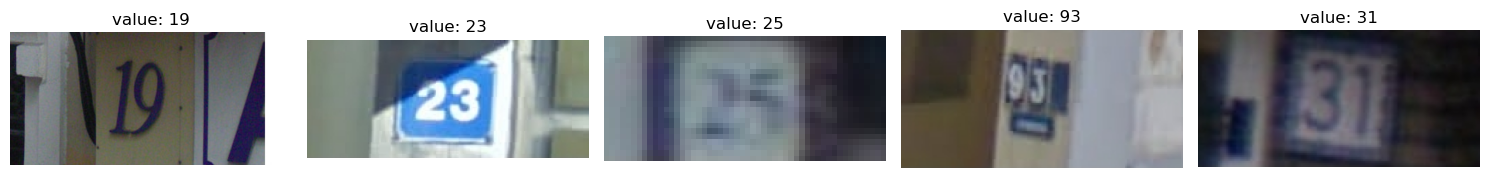

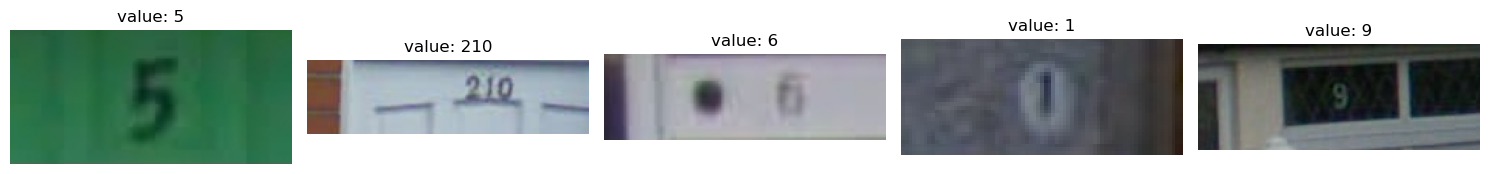

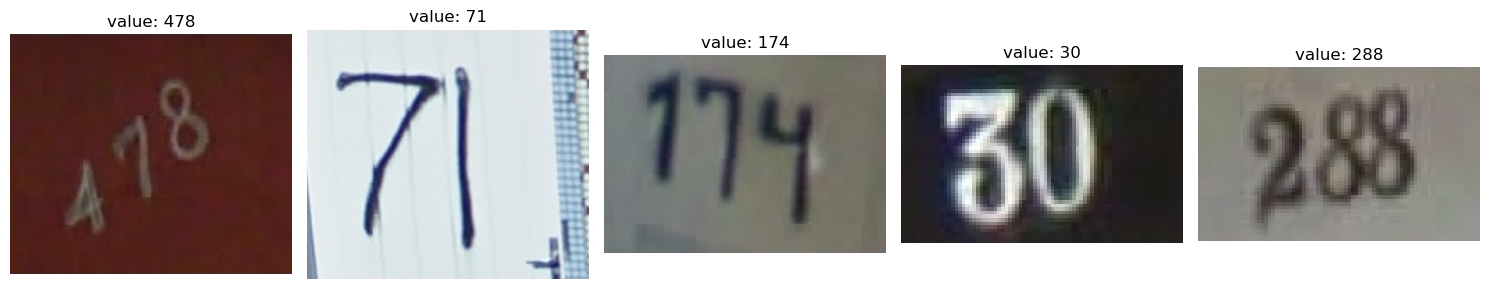

In [10]:
def show_sample_images(df, image_dir, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        img_path = os.path.join(image_dir, df.iloc[i]['filename'])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f"value: {df.iloc[i]['value']}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample_images(train_df, 'F:/SVHN/train/train/' , num_samples=5)
show_sample_images(test_df, 'F:/SVHN/test/test/' , num_samples=5)
show_sample_images(extra_df, 'F:/SVHN/extra/extra/' , num_samples=5)

## Analisando a distribuição

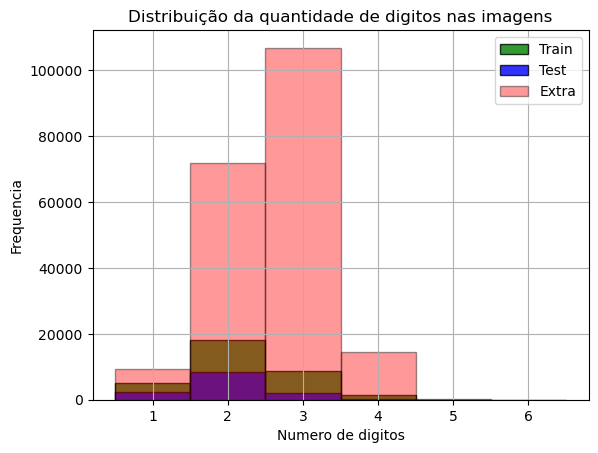

In [17]:
train_lengths = train_df["length"].tolist()
test_lengths = test_df["length"].tolist()
extra_lengths = extra_df["length"].tolist()

plt.hist(train_lengths, bins=range(1, max(train_lengths) + 2), color='green', alpha=0.8, label='Train', edgecolor='black', align='left')
plt.hist(test_lengths, bins=range(1, max(test_lengths) + 2), color='blue', alpha=0.8, label='Test', edgecolor='black', align='left')
plt.hist(extra_lengths, bins=range(1, max(extra_lengths) + 2), color='red', alpha=0.4, label='Extra', edgecolor='black', align='left')

plt.title("Distribuição da quantidade de digitos nas imagens")
plt.xlabel("Numero de digitos")
plt.ylabel("Frequencia")
plt.xticks(range(1, max(max(train_lengths), max(test_lengths), max(extra_lengths)) + 1))
plt.legend()
plt.grid(True)
plt.show()

## O que você deve procurar no gráfico resultante?
Ao executar esse código, você verá um gráfico com três distribuições sobrepostas. O objetivo dessa análise geralmente é verificar a consistência dos dados:

1. Validação de Distribuição: Se o gráfico de Treino (Verde) e Teste (Azul) tiverem formatos muito diferentes, seu modelo de Machine Learning pode falhar, 
pois estará aprendendo com um tipo de dado e sendo testado em outro muito diferente.

2. Identificação de Outliers: Se houver barras isoladas muito longe da "massa" principal de dados, 
você pode ter imagens com proporções estranhas (ex: imagens panorâmicas muito largas ou "tiras" muito finas) que podem precisar de tratamento.

3. Natureza das Imagens: Se houver picos específicos (por exemplo, um pico em 1.0 e outro em 1.77), 
isso indica que suas imagens seguem padrões comuns, como formato quadrado (1:1) ou widescreen (16:9).

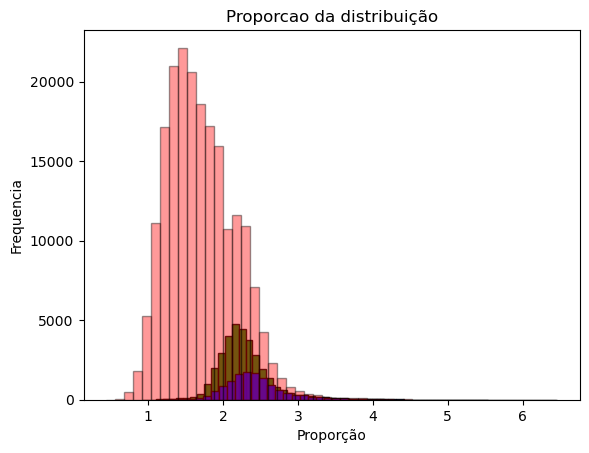

In [20]:
def calculate_aspect_ratio(width, height):
    return width / height if height != 0 else 0
    
train_df['Aspect_Ratio'] = train_df.apply(lambda row: calculate_aspect_ratio(row['width'], row['height']), axis=1)
test_df['Aspect_Ratio'] = test_df.apply(lambda row: calculate_aspect_ratio(row['width'], row['height']), axis=1)
extra_df['Aspect_Ratio'] = extra_df.apply(lambda row: calculate_aspect_ratio(row['width'], row['height']), axis=1)

plt.hist(train_df['Aspect_Ratio'], bins=50, alpha=0.9, color='green', label='Train', edgecolor='black')
plt.hist(test_df['Aspect_Ratio'], bins=50, alpha=0.9, color='blue', label='Test', edgecolor='black')
plt.hist(extra_df['Aspect_Ratio'], bins=50, alpha=0.4, color='red', label='Extra', edgecolor='black')
plt.title("Proporcao da distribuição")
plt.xlabel("Proporção")
plt.ylabel("Frequencia")
plt.show()